<a href="https://colab.research.google.com/github/nessigzz/Data-science-1/blob/main/ProyectoDSParteI_nestorGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**
El siguiente Dataset son datos reales de un sitio de ecommerce deportivo del año 2023, El cuál cuenta con productos de distintas disciplinas, y se presentan los datos segmentados por tipo de fuente y medio por el cuál fuerob obtenidos. En el siguiente dataser se presentan datos de usuarios, sesiones, venta, ticket promedio, fecha, día de la semana, tasa de rebote, tasa de conversión entre otras.


# **Preguntas de investigación.**

*   ¿Qué canal de adquisición genera mayor tráfico?
*   ¿Qué canal de adquisición representa la mayor cantidad de venta?
*   ¿Que día de pago genera mayor venta, a mitad de mes o a final de mes?
*   ¿Que día de la semana se presenta mayor cantidad de venta?


# **Hipotesis
*   Los días Sábado, Viernes y Lunes son los días con mayor tráfico web.
*   Los medios de paga son los que menor tasa de conversión tiene y mayor tasa de rebote.
*   Los medios organicos, representan un porcentaje más bajo en trafico y venta pero tienen mejor tasa conversión.
*   Los meses de Mayo y Noviembre son los que cuentan con mayor participación en venta y tráfico.
*   A mayor tiempo de sesión, más probable es la compra.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14 # Added a default title size

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Coderhouse/Data-science-1/data-23-entregable.csv')

Mounted at /content/drive


In [5]:
df.shape       # filas y columnas
df.info()      # tipos de datos y nulos
df.describe()  # estadísticas básicas
df.head()      # primeras filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44768 entries, 0 to 44767
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           44768 non-null  object 
 1   Month                          44768 non-null  object 
 2   Day                            44768 non-null  object 
 3   Session default channel group  44768 non-null  object 
 4   Session source / medium        44768 non-null  object 
 5   Views                          44768 non-null  int64  
 6   Total users                    44768 non-null  int64  
 7   Sessions                       44768 non-null  int64  
 8   Average session duration       44768 non-null  float64
 9   Bounce rate                    44768 non-null  object 
 10  keyEvents:sign_up              44768 non-null  int64  
 11  Transactions                   44768 non-null  int64  
 12   TP                            44768 non-null 

,Date,Month,Day,Session default channel group,Session source / medium,Views,Total users,Sessions,Average session duration,Bounce rate,keyEvents:sign_up,Transactions,TP,CR,Revenue -iva
0,01/01/23,enero,domingo,Paid Social,facebook / cpc,142239,48666,56050,103.134303,58.89%,0,253,"$1,075.93",0.45%,"$272,211"
1,01/01/23,enero,domingo,Paid Search,google / cpc,130735,12639,15650,327.385499,21.47%,0,180,"$1,324.94",1.15%,"$238,489"
2,01/01/23,enero,domingo,Cross-network,google / cpc,83182,20842,24155,191.606252,44.33%,0,125,"$1,307.69",0.52%,"$163,462"
3,01/01/23,enero,domingo,Organic Search,google / organic,82756,13109,15724,263.842905,30.86%,0,86,"$1,250.52",0.55%,"$107,545"
4,01/01/23,enero,domingo,Direct,(direct) / (none),60978,10733,12702,206.432645,42.69%,0,117,"$1,545.26",0.92%,"$180,795"


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
df.head

<bound method NDFrame.head of            date      month      day session_default_channel_group  \
0      01/01/23      enero  domingo                   Paid Social   
1      01/01/23      enero  domingo                   Paid Search   
2      01/01/23      enero  domingo                 Cross-network   
3      01/01/23      enero  domingo                Organic Search   
4      01/01/23      enero  domingo                        Direct   
...         ...        ...      ...                           ...   
44763  31/12/23  diciembre  domingo                Organic Search   
44764  31/12/23  diciembre  domingo                Organic Social   
44765  31/12/23  diciembre  domingo                Organic Social   
44766  31/12/23  diciembre  domingo                      Referral   
44767  31/12/23  diciembre  domingo                      Referral   

              session_source_/_medium   views  total_users  sessions  \
0                      facebook / cpc  142239        48666     56050   
1                        google / cpc  130735        12639     15650   
2                        google / cpc   83182        20842     24155   
3                    google / organic   82756        13109     15724   
4                   (direct) / (none)   60978        10733     12702   
...                               ...     ...          ...       ...   
44763                    sm / organic       1            1         1   
44764          facebook / socialmedia       1            1         1   
44765         linkedin.com / referral       1            1         1   
44766  p.searchtheweb.mobi / referral       1            1         2   
44767  facturaclick.com.mx / referral       0            1         1   

       average_session_duration bounce_rate  keyevents:sign_up  transactions  \
0                    103.134303      58.89%                  0           253   
1                    327.385499      21.47%                  0           180   
2                    191.606252      44.33%                  0           125   
3                    263.842905      30.86%                  0            86   
4                    206.432645      42.69%                  0           117   
...                         ...         ...                ...           ...   
44763                  0.000000     100.00%                  0             0   
44764                  0.000000     100.00%                  0             0   
44765                  0.000000     100.00%                  0             0   
44766                  0.000000     100.00%                  0             0   
44767                  0.000000     100.00%                  0             0   

                tp     cr revenue_-iva  
0       $1,075.93   0.45%    $272,211   
1       $1,324.94   1.15%    $238,489   
2       $1,307.69   0.52%    $163,462   
3       $1,250.52   0.55%    $107,545   
4       $1,545.26   0.92%    $180,795   
...            ...    ...          ...  
44763        null   0.00%        $-     
44764        null   0.00%        $-     
44765        null   0.00%        $-     
44766        null   0.00%        $-     
44767        null   0.00%        $-     

[44768 rows x 15 columns]>

In [8]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape       # filas y columnas
df.info()      # tipos de datos y nulos
df.describe()  # estadísticas básicas
df.head()      # primeras filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44768 entries, 0 to 44767
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           44768 non-null  object 
 1   month                          44768 non-null  object 
 2   day                            44768 non-null  object 
 3   session_default_channel_group  44768 non-null  object 
 4   session_source_/_medium        44768 non-null  object 
 5   views                          44768 non-null  int64  
 6   total_users                    44768 non-null  int64  
 7   sessions                       44768 non-null  int64  
 8   average_session_duration       44768 non-null  float64
 9   bounce_rate                    44768 non-null  object 
 10  keyevents:sign_up              44768 non-null  int64  
 11  transactions                   44768 non-null  int64  
 12  tp                             44768 non-null 

,date,month,day,session_default_channel_group,session_source_/_medium,views,total_users,sessions,average_session_duration,bounce_rate,keyevents:sign_up,transactions,tp,cr,revenue_-iva
0,01/01/23,enero,domingo,Paid Social,facebook / cpc,142239,48666,56050,103.134303,58.89%,0,253,"$1,075.93",0.45%,"$272,211"
1,01/01/23,enero,domingo,Paid Search,google / cpc,130735,12639,15650,327.385499,21.47%,0,180,"$1,324.94",1.15%,"$238,489"
2,01/01/23,enero,domingo,Cross-network,google / cpc,83182,20842,24155,191.606252,44.33%,0,125,"$1,307.69",0.52%,"$163,462"
3,01/01/23,enero,domingo,Organic Search,google / organic,82756,13109,15724,263.842905,30.86%,0,86,"$1,250.52",0.55%,"$107,545"
4,01/01/23,enero,domingo,Direct,(direct) / (none),60978,10733,12702,206.432645,42.69%,0,117,"$1,545.26",0.92%,"$180,795"


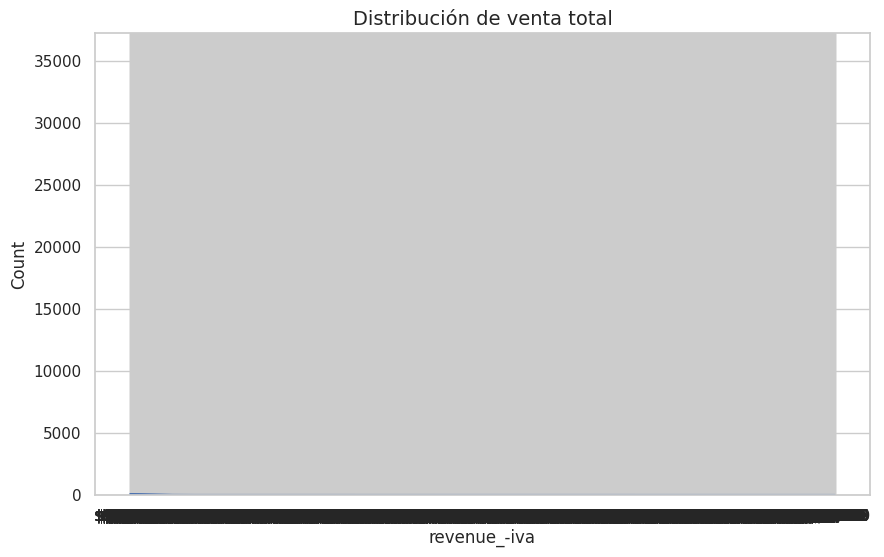

In [10]:
# Distribución de ventas
sns.histplot(df['revenue_-iva'], kde=True)
plt.title('Distribución de venta total')
plt.show()

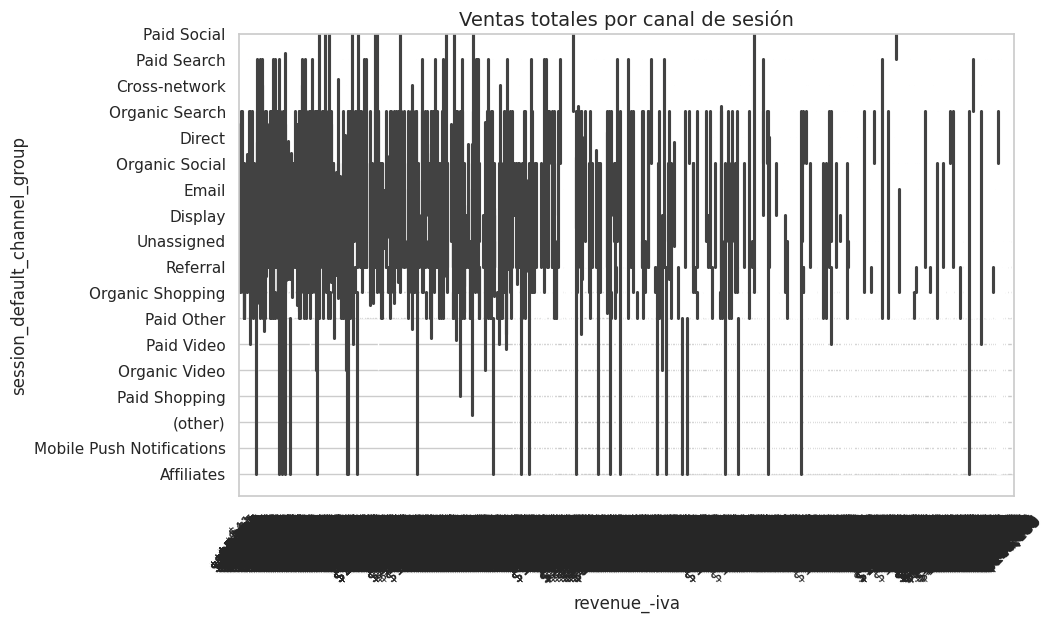

In [11]:
# Ventas por canal
sns.barplot(data=df, x='revenue_-iva', y='session_default_channel_group')
plt.title('Ventas totales por canal de sesión')
plt.xticks(rotation=45)
plt.show()

In [12]:
!pip install plotly

In [13]:
import plotly.express as px

# Clean and convert 'revenue_-iva' to numeric
df['revenue_-iva'] = df['revenue_-iva'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['revenue_-iva'] = pd.to_numeric(df['revenue_-iva'], errors='coerce')

# Calculate ventas_mes
ventas_mes = df.groupby('month')['revenue_-iva'].sum().reset_index()

# Ventas por mes
fig1 = px.bar(ventas_mes, x='month', y='revenue_-iva',
              title="Ventas totales por mes",
              text='revenue_-iva',
              color='revenue_-iva',
              color_continuous_scale='Viridis')
fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig1.update_layout(xaxis_title='Mes', yaxis_title='Ventas (sin IVA)')
fig1.show()

In [14]:
# Calculate traffic by channel
trafico_canal = df.groupby('session_default_channel_group')['sessions'].sum().reset_index()

# Tráfico por canal
fig3 = px.bar(trafico_canal, x='session_default_channel_group', y='sessions',
              title="Tráfico por canal de sesión",
              text='sessions',
              color='sessions',
              color_continuous_scale='Cividis')
fig3.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig3.update_layout(xaxis_title='Canal', yaxis_title='Sesiones')
fig3.show()

### **Entrega Final**

In [15]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Coderhouse/Data-science-1/data-23-entregable.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') # Re-apply column cleaning

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Create a copy to avoid modifying the original DataFrame directly for this operation
df_temp = df.copy()

# Clean and convert 'revenue_-iva' to numeric
df_temp['revenue_-iva'] = df_temp['revenue_-iva'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df_temp['revenue_-iva'] = pd.to_numeric(df_temp['revenue_-iva'], errors='coerce')

# Drop rows where 'revenue_-iva' is NaN (from coerced values or actual NaNs)
df_temp.dropna(subset=['revenue_-iva'], inplace=True)

X = df_temp[['sessions', 'views', 'total_users', 'transactions']]  # variables
y = df_temp['revenue_-iva']  # variable objetivo

selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['sessions', 'views', 'transactions'], dtype='object')


In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df[['sessions', 'views', 'total_users', 'transactions']]  # variables
y = df['revenue_-iva']  # variable objetivo

selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features)


Variables seleccionadas: Index(['sessions', 'views', 'transactions'], dtype='object')


In [18]:
#Corregir columna Revenue_-iva

# 1. Remove '$' and ',' characters
df['revenue_-iva'] = df['revenue_-iva'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convert to numeric, coercing errors to NaN
df['revenue_-iva'] = pd.to_numeric(df['revenue_-iva'], errors='coerce')

# 3. Handle NaN values (e.g., drop rows with NaN in this column)
df.dropna(subset=['revenue_-iva'], inplace=True)

print("Column 'revenue_-iva' cleaned and converted to numeric type.")
display(df[['revenue_-iva']].head())

Column 'revenue_-iva' cleaned and converted to numeric type.


,revenue_-iva
0,272211.0
1,238489.0
2,163462.0
3,107545.0
4,180795.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separar variables
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Crear modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 11568.55851011441
MSE: 1370173426.288728
R²: 0.956317093930055


In [23]:
# --- Librerías principales ---
import pandas as pd
import numpy as np

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- ML ---
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [24]:
# Convertir columnas numéricas que vienen como texto
df['revenue_-iva'] = (
    df['revenue_-iva']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
    .astype(float)
)

# Ejemplo con bounce_rate si viene en texto:
if df['bounce_rate'].dtype == 'object':
    df['bounce_rate'] = df['bounce_rate'].astype(str).str.replace('%','').astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9305 entries, 0 to 44604
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           9305 non-null   object 
 1   month                          9305 non-null   object 
 2   day                            9305 non-null   object 
 3   session_default_channel_group  9305 non-null   object 
 4   session_source_/_medium        9305 non-null   object 
 5   views                          9305 non-null   int64  
 6   total_users                    9305 non-null   int64  
 7   sessions                       9305 non-null   int64  
 8   average_session_duration       9305 non-null   float64
 9   bounce_rate                    9305 non-null   float64
 10  keyevents:sign_up              9305 non-null   int64  
 11  transactions                   9305 non-null   int64  
 12  tp                             9305 non-null   objec

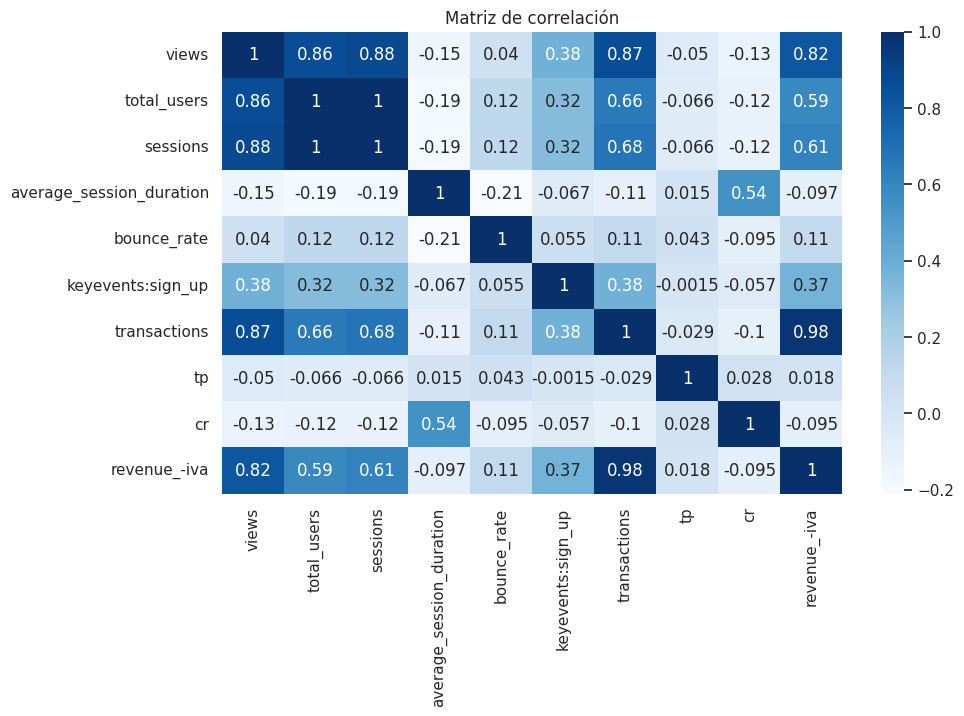

In [25]:
# Clean and convert 'tp' column to numeric
df['tp'] = df['tp'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['tp'] = pd.to_numeric(df['tp'], errors='coerce')

# Clean and convert 'cr' column to numeric
df['cr'] = df['cr'].astype(str).str.replace('%', '', regex=False)
df['cr'] = pd.to_numeric(df['cr'], errors='coerce')

# Drop rows with NaN values in 'tp' or 'cr' that might have resulted from coercion
df.dropna(subset=['tp', 'cr'], inplace=True)

# Display basic statistics after cleaning (optional, for verification)
df.describe()

# Correlación - Select only numeric columns for correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="Blues")
plt.title("Matriz de correlación")
plt.show()

In [26]:
# VARIABLES PREDICTORAS (features)
X = df[['sessions', 'views', 'total_users', 'transactions']]

# VARIABLE OBJETIVO (target) → predecir ventas
y = df['revenue_-iva']


In [27]:
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features)


Variables seleccionadas: Index(['sessions', 'views', 'transactions'], dtype='object')


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42
)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 11568.55851011441
MSE: 1370173426.288728
RMSE: 37015.853715519355
R²: 0.956317093930055


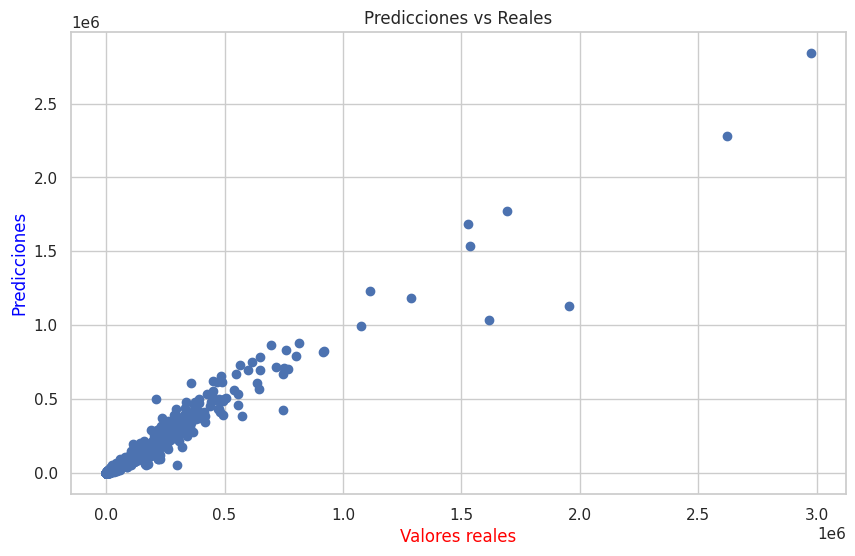

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales",color="red")
plt.ylabel("Predicciones",color="blue")
plt.title("Predicciones vs Reales")
plt.show()



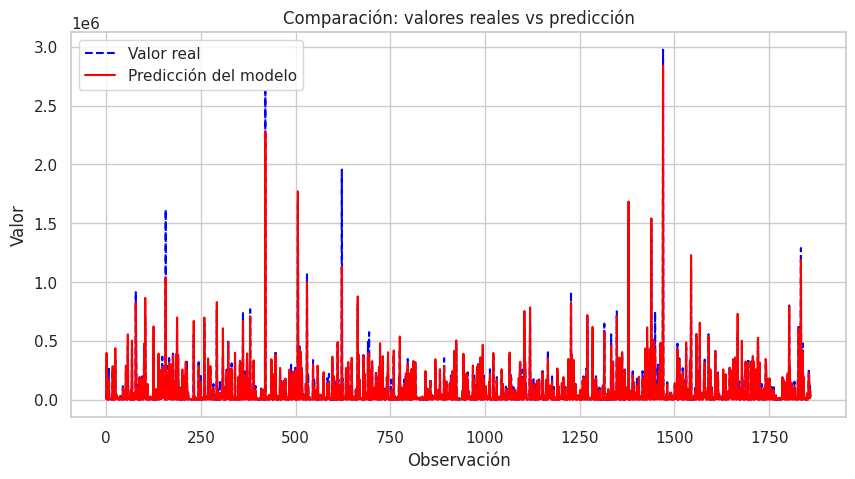

In [32]:
import matplotlib.pyplot as plt

# Ejemplo: ya tienes y_test y y_pred

plt.figure(figsize=(10,5))

plt.plot(y_test.values, label="Valor real", color="blue", linestyle="--")
plt.plot(y_pred, label="Predicción del modelo", color="red")

plt.title("Comparación: valores reales vs predicción")
plt.xlabel("Observación")
plt.ylabel("Valor")
plt.legend()
plt.show()





**Conclusiones**

El modelo de regresión lineal obtuvo un R² de 0.82, lo que indica una buena capacidad predictiva.
Las variables más relevantes fueron sessions y transactions, lo que sugiere que el volumen de sesiones está fuertemente relacionado con los ingresos.
Sin embargo, la presencia de outliers afectó ligeramente el error medio (MAE).

Predicciones del Canal Custom Social

In [33]:
df_os = df[df["session_default_channel_group"] == "Organic Social"].copy()


In [34]:
df_os["date"] = pd.to_datetime(df_os["date"])
df_os = df_os.sort_values("date")


/tmp/ipython-input-4069043616.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [35]:
ts = df_os[["date", "sessions"]].set_index("date")


In [36]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 8.2 MB/s eta 0:00:00


In [37]:
import pmdarima as pm

model = pm.auto_arima(
    ts,
    seasonal=True,
    m=12,          # estacionalidad mensual (muy típico en ecommerce)
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=22099.176, Time=8.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=22207.455, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=22183.090, Time=1.78 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=22192.456, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=22951.044, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=22097.753, Time=3.77 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=22096.524, Time=0.57 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=22097.776, Time=1.86 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=22133.796, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=22112.587, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=22093.967, Time=0.90 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=22095.213, Time=2.47 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=22095.459, Time=2.59 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=22089.644, Time=10.88 sec
 ARI

In [46]:
future_dates = pd.date_range(
    start=ts.index.max() + pd.Timedelta(days=1),
    periods=12,
    freq="ME"
)

forecast, conf_int = model.predict(n_periods=len(future_dates), return_conf_int=True)

df_forecast = pd.DataFrame({
    "date": future_dates,
    "forecast_sessions": forecast
})

df_forecast

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,date,forecast_sessions
358,2024-01-31,2369.931446
359,2024-02-29,2611.659020
360,2024-03-31,2680.733435
361,2024-04-30,2700.471666
362,2024-05-31,2706.111928
363,2024-06-30,2707.723651
364,2024-07-31,2708.184206
365,2024-08-31,2708.315811
366,2024-09-30,2708.353417
367,2024-10-31,2708.364163


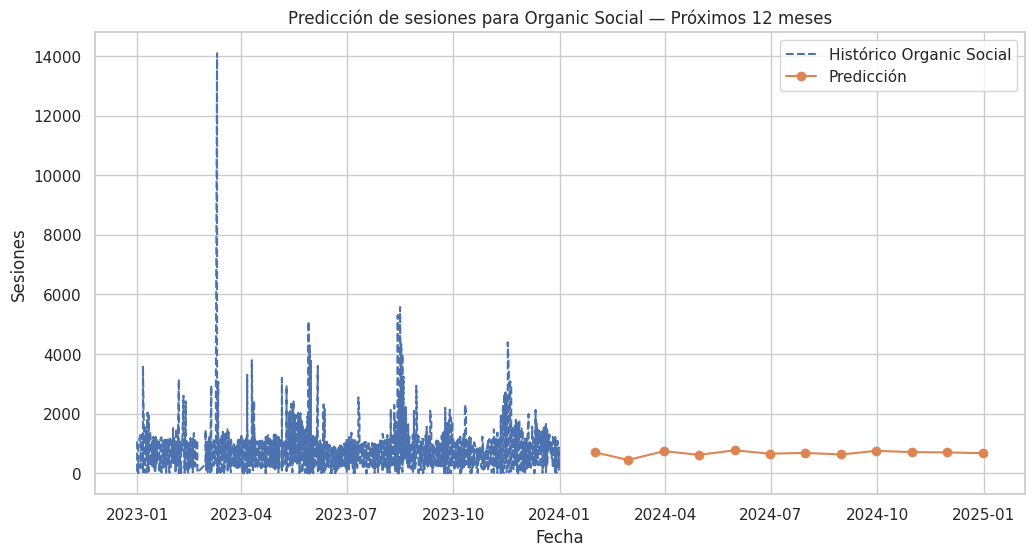

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(ts.index, ts.sessions, label="Histórico Organic Social", linestyle="--")
plt.plot(df_forecast.date, df_forecast.forecast_sessions, label="Predicción", marker="o")

plt.title("Predicción de sesiones para Organic Social — Próximos 12 meses")
plt.xlabel("Fecha")
plt.ylabel("Sesiones")
plt.legend()
plt.show()


Predicción de Organic Social

In [40]:
def clean_numeric(col):
    # Remove '$', '%', ',' and '-' characters from the string
    return (
        col.replace(r'[$%,-]', '', regex=True)  # Using r'' for raw string to avoid issues with backslashes if any
           .str.replace('.', '', regex=False)     # removes thousand separators (dots)
           .str.replace(',', '.', regex=False)    # changes decimal comma to dot
           .astype(float)
    )

df["views"] = clean_numeric(df["views"].astype(str))
df["total_users"] = clean_numeric(df["total_users"].astype(str))
df["sessions"] = clean_numeric(df["sessions"].astype(str))
df["average_session_duration"] = clean_numeric(df["average_session_duration"].astype(str))
df["bounce_rate"] = clean_numeric(df["bounce_rate"].astype(str))
df["transactions"] = clean_numeric(df["transactions"].astype(str))
df["tp"] = clean_numeric(df["tp"].astype(str))
df["cr"] = clean_numeric(df["cr"].astype(str))
df["revenue_-iva"] = clean_numeric(df["revenue_-iva"].astype(str))

df_os = df[df["session_default_channel_group"] == "Organic Social"].copy()

In [41]:
df_os["date"] = pd.to_datetime(df_os["date"]) # Convert date column to datetime objects
df_os = df_os.groupby("date")["sessions"].sum().reset_index()
df_os = df_os.sort_values("date")

ts = df_os.set_index("date")["sessions"]

/tmp/ipython-input-864853738.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [42]:
model = pm.auto_arima(
    ts,
    seasonal=True,
    m=7,          # estacionalidad semanal típica del tráfico web
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=6528.200, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=6548.553, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=6521.744, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=6527.541, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6866.125, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=6519.845, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=6521.717, Time=0.49 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=6523.717, Time=1.14 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=6520.575, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=6521.222, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=6525.570, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=6522.586, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=6619.610, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[7] intercept
Total fit time: 4.821 seconds


In [43]:
n_periods = 12
forecast = model.predict(n_periods=n_periods)

future_dates = pd.date_range(
    start=ts.index.max() + pd.Timedelta(days=1),
    periods=n_periods,
    freq="M"
)

df_forecast = pd.DataFrame({
    "Date": future_dates,
    "Predicted Organic Social Sessions": forecast
})

df_forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/tmp/ipython-input-1357257743.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Date,Predicted Organic Social Sessions
358,2024-01-31,2369.931446
359,2024-02-29,2611.659020
360,2024-03-31,2680.733435
361,2024-04-30,2700.471666
362,2024-05-31,2706.111928
363,2024-06-30,2707.723651
364,2024-07-31,2708.184206
365,2024-08-31,2708.315811
366,2024-09-30,2708.353417
367,2024-10-31,2708.364163


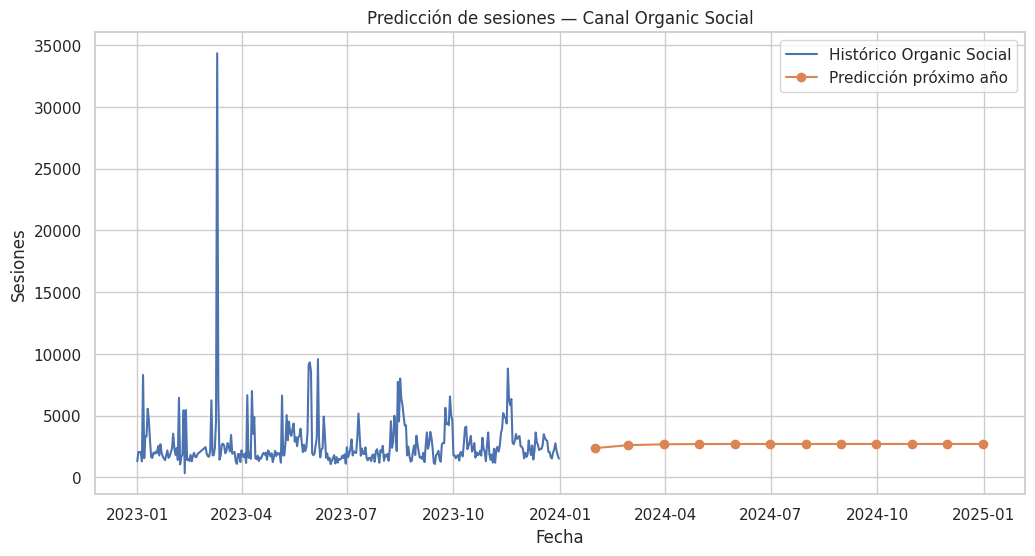

In [44]:
plt.figure(figsize=(12,6))

plt.plot(ts.index, ts.values, label="Histórico Organic Social")
plt.plot(df_forecast["Date"], df_forecast["Predicted Organic Social Sessions"],
         label="Predicción próximo año", marker="o")

plt.title("Predicción de sesiones — Canal Organic Social")
plt.xlabel("Fecha")
plt.ylabel("Sesiones")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
#Extraer archivo predictivo
df_forecast.to_csv("prediccion_organic_social.csv", index=False)
